### homework1：完成集成学习例子练习，理解boosting和bagging

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
x = np.arange(0, 12).reshape(3, 4)
y = np.array([True, False, True])
print(x)
print(y)
# 使用布尔数组y来选择x中的行，并选择这些行的第2列（索引为1）
# 具体来说，y为True的行会被选中，False的行会被忽略
# 因此，x[y, 1]会选择x的第1行和第3行的第2列
x[y, 1]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ True False  True]


array([1, 9])

In [3]:
# x是特征，y是标签
# 使用make_moons函数生成一个模拟数据集
# n_samples=50000: 生成50000个样本
# noise=0.3: 添加噪声，控制数据点的分散程度
# random_state=42: 设置随机种子，确保每次运行结果一致
x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)
print(x.shape)
print(y.shape)
# 打印y中的唯一值，即数据集中所有可能的标签类别
# 对于make_moons生成的数据集，y的值为0和1，表示两类数据
print(np.unique(y))

(50000, 2)
(50000,)
[0 1]


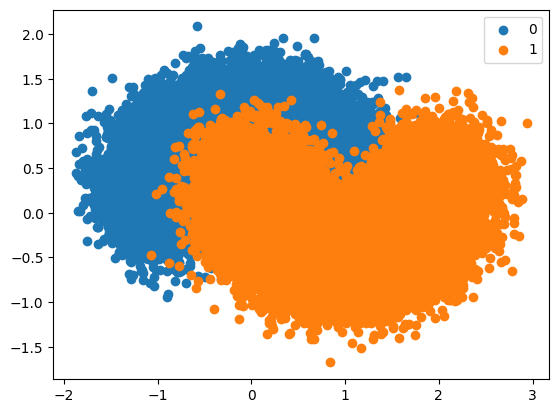

In [4]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])  #拿到特征中标签为0的第0列，拿到标签为0的第一列
plt.scatter(x[y == 1, 0], x[y == 1, 1])  #拿到特征中标签为1的第0列，拿到标签为1的第一列
plt.legend(['0', '1'])
plt.show()  #图形的点颜色是自动的

In [9]:
x[y == 0, 0][0:5]

array([0.11096372, 0.61562814, 0.46175947, 0.51249388, 0.63961463])

In [6]:
x[0:10]

array([[ 0.71820567, -0.21809028],
       [ 0.11096372,  1.10964541],
       [ 0.61562814, -0.06539887],
       [ 0.46175947,  1.17926518],
       [ 1.22553968, -0.51211163],
       [ 1.27989488,  0.19395679],
       [ 0.51249388,  1.21727796],
       [ 1.97017831,  0.3277893 ],
       [ 0.63961463,  0.9269041 ],
       [ 0.38809941, -0.32770396]])

In [10]:
#默认分割比例是75%和25%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression  # 导入逻辑回归模型

# 逻辑回归是一种用于分类任务的机器学习算法
# 它通过拟合数据来预测样本属于某个类别的概率

# 创建一个逻辑回归模型的实例
log_clf = LogisticRegression()

# 使用训练数据拟合模型
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
log_clf.fit(x_train, y_train)

# 使用测试数据评估模型的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
accuracy = log_clf.score(x_test, y_test)

# 打印模型的准确率
print("模型在测试集上的准确率:", accuracy)

模型在测试集上的准确率: 0.85344


In [15]:
from sklearn.svm import SVC  # 导入支持向量机分类器（SVM）

# 支持向量机（SVM）是一种用于分类和回归任务的强大机器学习算法
# 它通过找到最佳的超平面来将不同类别的样本分开

# 创建一个支持向量机分类器的实例
# 默认使用径向基函数（RBF）作为核函数
svm_clf = SVC()

# 使用训练数据拟合模型
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
svm_clf.fit(x_train, y_train)

# 使用测试数据评估模型的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
accuracy = svm_clf.score(x_test, y_test)

# 打印模型的准确率
print("支持向量机模型在测试集上的准确率:", accuracy)

支持向量机模型在测试集上的准确率: 0.91216


In [16]:
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器

# 决策树是一种基于树结构的分类算法
# 它通过递归地划分数据集，选择最佳特征进行分割，直到满足停止条件

# 创建一个决策树分类器的实例
# 默认参数下，决策树会尽可能地生长，直到所有叶子节点纯净或达到其他停止条件
dt_clf = DecisionTreeClassifier()

# 使用训练数据拟合模型
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
dt_clf.fit(x_train, y_train)

# 使用测试数据评估模型的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
accuracy = dt_clf.score(x_test, y_test)

# 打印模型的准确率
print("决策树模型在测试集上的准确率:", accuracy)

决策树模型在测试集上的准确率: 0.87528


手动实现投票分类器

In [17]:
# 使用训练好的模型对测试集进行预测

# 1. 使用逻辑回归模型对测试集进行预测
# log_clf: 训练好的逻辑回归模型
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_predict1: 逻辑回归模型对测试集的预测结果，形状为 (n_samples,)
y_predict1 = log_clf.predict(x_test)

# 2. 使用支持向量机模型对测试集进行预测
# svm_clf: 训练好的支持向量机模型
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_predict2: 支持向量机模型对测试集的预测结果，形状为 (n_samples,)
y_predict2 = svm_clf.predict(x_test)

# 3. 使用决策树模型对测试集进行预测
# dt_clf: 训练好的决策树模型
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_predict3: 决策树模型对测试集的预测结果，形状为 (n_samples,)
y_predict3 = dt_clf.predict(x_test)

In [18]:
# 手动实现 Bagging（Bootstrap Aggregating）的投票机制
# Bagging 是一种集成学习方法，通过对多个模型的预测结果进行投票或平均来提高模型的稳定性和准确性

# 将三个模型的预测结果进行投票
# y_predict1: 逻辑回归模型的预测结果
# y_predict2: 支持向量机模型的预测结果
# y_predict3: 决策树模型的预测结果
# 通过将三个预测结果相加，判断是否大于等于2（即至少有两个模型预测为1）
# 最终结果转换为整数类型（0 或 1）
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

# 打印集成模型的前10个预测结果
# 查看集成模型的预测结果示例
y_predict[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [19]:
y_test[:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [20]:
from sklearn.metrics import accuracy_score

# accuracy_score计算准确率的
accuracy_score(y_test, y_predict)

0.90416

集成学习VotingClassifier(并行)

In [24]:
from sklearn.ensemble import VotingClassifier  # 导入投票分类器

# 创建一个投票分类器（VotingClassifier）实例
# VotingClassifier 是一种集成学习方法，通过结合多个基模型的预测结果来提高模型的性能
# estimators: 指定参与集成的基模型列表，每个模型以元组形式（名称, 模型实例）传入
# voting='hard': 使用硬投票机制，即少数服从多数，选择预测结果中出现次数最多的类别

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),  # 逻辑回归模型
    ('svm_clf', SVC()),  # 支持向量机模型
    ('dt_clf', DecisionTreeClassifier())  # 决策树模型
], voting='hard')

# 参数说明：
# - estimators: 一个列表，包含多个基模型。每个基模型以元组形式（名称, 模型实例）传入。
# - voting='hard': 使用硬投票机制，即少数服从多数。对于分类问题，选择预测结果中出现次数最多的类别。
#                 如果是回归问题，可以使用 voting='soft'，即对预测概率进行加权平均。

# voting_clf.fit(x_train, y_train) 训练模型
voting_clf.fit(x_train, y_train)
# voting_clf.score(x_test, y_test) 评估模型性能
accuracy = voting_clf.score(x_test, y_test)
# 打印模型的准确率
print("硬投票分类器在测试集上的准确率:", accuracy)

硬投票分类器在测试集上的准确率: 0.90424


In [25]:
# 创建一个软投票分类器（VotingClassifier）实例
# VotingClassifier 是一种集成学习方法，通过结合多个基模型的预测结果来提高模型的性能
# estimators: 指定参与集成的基模型列表，每个模型以元组形式（名称, 模型实例）传入
# voting='soft': 使用软投票机制，即对每个基模型的预测概率进行加权平均，选择概率最高的类别

# 默认情况下，支持向量机（SVC）不直接输出类别的概率，而是输出类别的预测结果（0 或 1）
# 软投票（voting='soft'）需要每个基模型输出类别的概率（即每个类别的预测概率分布）
# 设置 probability=True 后，SVC 会启用概率估计功能，通过 Platt Scaling 或 Isotonic Regression 方法计算类别的概率。
# 如果不设置 probability=True，SVC 无法用于软投票。

voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),  # 逻辑回归模型
    ('svm_clf', SVC(probability=True)),  # 支持向量机模型，设置 probability=True 以启用概率预测
    ('dt_clf', DecisionTreeClassifier())  # 决策树模型
], voting='soft')

# 训练软投票分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
voting_clf2.fit(x_train, y_train)

# 评估软投票分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
accuracy = voting_clf2.score(x_test, y_test)

# 打印模型的准确率
print("软投票分类器在测试集上的准确率:", accuracy)

软投票分类器在测试集上的准确率: 0.90368


使用bagging

In [26]:
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器
from sklearn.ensemble import BaggingClassifier  # 导入 Bagging 集成分类器

# 使用 Bagging 方法集成多个决策树模型
# Bagging 是一种集成学习方法，通过对训练集进行有放回抽样（Bootstrap Sampling）生成多个子集，
# 并在每个子集上训练一个基模型，最后通过投票或平均的方式结合所有基模型的预测结果。

# 创建一个 Bagging 分类器实例
# DecisionTreeClassifier(): 基模型为决策树
# n_estimators=300: 集成的决策树数量为300
# max_samples=3000: 每个子集的样本数量为3000（从训练集中有放回抽样）
# bootstrap=True: 使用有放回抽样（Bootstrap Sampling）生成子集
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300,
                                max_samples=3000, bootstrap=True)

# 使用训练数据拟合 Bagging 分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
bagging_clf.fit(x_train, y_train)

# 使用测试数据评估 Bagging 分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
accuracy = bagging_clf.score(x_test, y_test)

# 打印模型的准确率
print("Bagging 分类器在测试集上的准确率:", accuracy)

Bagging 分类器在测试集上的准确率: 0.91184


oob设计

In [40]:
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器
from sklearn.ensemble import BaggingClassifier  # 导入 Bagging 集成分类器

In [27]:

# 使用 Bagging 方法集成多个决策树模型，并利用 OOB（Out-of-Bag）样本进行模型评估
# Bagging 是一种集成学习方法，通过对训练集进行有放回抽样（Bootstrap Sampling）生成多个子集，
# 并在每个子集上训练一个基模型。OOB 样本是指那些在 Bootstrap 抽样中没有被选中的样本，可以用来评估模型性能。

# 创建一个 Bagging 分类器实例
# DecisionTreeClassifier(): 基模型为决策树
# n_estimators=500: 集成的决策树数量为500
# max_samples=1000: 每个子集的样本数量为1000（从训练集中有放回抽样）
# bootstrap=True: 使用有放回抽样（Bootstrap Sampling）生成子集
# oob_score=True: 启用 OOB 评估，使用未被选中的样本作为验证集
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=1000,
                                 bootstrap=True, oob_score=True)

# 使用训练数据拟合 Bagging 分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
bagging_clf2.fit(x_train, y_train)

# 获取 OOB 评估分数
# oob_score_ 是 Bagging 分类器在 OOB 样本上的准确率
# OOB 样本是那些在 Bootstrap 抽样中没有被选中的样本，可以用来评估模型的泛化性能
oob_score = bagging_clf2.oob_score_

# 打印 OOB 评估分数
print("Bagging 分类器的 OOB 分数:", oob_score)

Bagging 分类器的 OOB 分数: 0.9151466666666667


In [28]:
# 使用测试数据评估 Bagging 分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
test_accuracy = bagging_clf2.score(x_test, y_test)

# 打印模型在测试集上的准确率
print("Bagging 分类器在测试集上的准确率:", test_accuracy)

Bagging 分类器在测试集上的准确率: 0.9132


njobs参数

%%time：Jupyter Notebook 的魔法命令，用于测量代码块的运行时间

In [35]:
%%time

# 创建一个 Bagging 分类器实例
# DecisionTreeClassifier(): 基模型为决策树
# n_estimators=500: 集成的决策树数量为500
# max_samples=2000: 每个子集的样本数量为2000（从训练集中有放回抽样）
# bootstrap=True: 使用有放回抽样（Bootstrap Sampling）生成子集
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=2000,
                                bootstrap=True)

# 使用训练数据拟合 Bagging 分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
bagging_clf.fit(x_train, y_train)

# 使用测试数据评估 Bagging 分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
test_accuracy = bagging_clf.score(x_test, y_test)

# 打印模型在测试集上的准确率
print("Bagging 分类器在测试集上的准确率:", test_accuracy)

Bagging 分类器在测试集上的准确率: 0.91256
CPU times: total: 2.36 s
Wall time: 2.45 s


In [36]:
%%time

# 使用多核并行计算加速 Bagging 分类器的训练和预测
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算

# 创建一个 Bagging 分类器实例
# DecisionTreeClassifier(): 基模型为决策树
# n_estimators=500: 集成的决策树数量为500
# max_samples=2000: 每个子集的样本数量为2000（从训练集中有放回抽样）
# bootstrap=True: 使用有放回抽样（Bootstrap Sampling）生成子集
# n_jobs=-1: 使用所有可用的 CPU 核心进行并行计算
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=2000,
                                bootstrap=True, n_jobs=-1)

# 使用训练数据拟合 Bagging 分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
bagging_clf.fit(x_train, y_train)

# 使用测试数据评估 Bagging 分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
test_accuracy = bagging_clf.score(x_test, y_test)

# 打印模型在测试集上的准确率
print("Bagging 分类器在测试集上的准确率:", test_accuracy)

Bagging 分类器在测试集上的准确率: 0.91272
CPU times: total: 219 ms
Wall time: 2.87 s


bootstrap_features  对特征进行采样

In [37]:
# 使用 Bagging 方法对特征进行采样（随机子空间方法）
# 由于我们只有两个特征，设置 max_features=1 表示每次随机选择一个特征进行训练
# 这种方法适用于特征较多的情况，但在特征较少时可能会导致性能下降

# 创建一个 Bagging 分类器实例
# DecisionTreeClassifier(): 基模型为决策树
# n_estimators=500: 集成的决策树数量为500
# max_samples=500: 每个子集的样本数量为500（从训练集中有放回抽样）
# oob_score=True: 启用 OOB（Out-of-Bag）评估，使用未被选中的样本作为验证集
# bootstrap=True: 使用有放回抽样（Bootstrap Sampling）生成子集
# n_jobs=-1: 使用所有可用的 CPU 核心进行并行计算
# max_features=1: 每次随机选择1个特征进行训练（随机子空间方法）
# bootstrap_features=True: 对特征进行有放回抽样
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                                         n_estimators=500, max_samples=500, oob_score=True,
                                         bootstrap=True, n_jobs=-1,
                                         max_features=1, bootstrap_features=True)

# 使用全部数据拟合 Bagging 分类器
# x: 全部特征数据，形状为 (n_samples, n_features)
# y: 全部标签数据，形状为 (n_samples,)
random_subspaces_clf.fit(x, y)

# 获取 OOB 评估分数
# oob_score_ 是 Bagging 分类器在 OOB 样本上的准确率
# OOB 样本是那些在 Bootstrap 抽样中没有被选中的样本，可以用来评估模型的泛化性能
oob_score = random_subspaces_clf.oob_score_

# 打印 OOB 评估分数
print("随机子空间 Bagging 分类器的 OOB 分数:", oob_score)

随机子空间 Bagging 分类器的 OOB 分数: 0.8871


In [39]:
# 这里是为了验证总的抽样的样本数不能大于训练集的数目
# 如果训练集的样本数小于50001，代码会报错，因为无法从训练集中抽取超过其样本数的子集。
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                                       n_estimators=500, max_samples=50001, oob_score=True,
                                       bootstrap=True, n_jobs=-1,
                                       max_features=1, bootstrap_features=True)
random_patches_clf.fit(x, y)
random_patches_clf.oob_score_
# 这个代码有另外一个名字就是随机森林
# 这段代码实际上是手动实现了一个类似于**随机森林（Random Forest）**的模型。随机森林是一种基于 Bagging 和随机子空间方法的集成学习算法，其核心思想是：
# 1.Bagging:
# 通过对训练集进行有放回抽样生成多个子集，并在每个子集上训练一个决策树模型。
# 2.随机子空间:
# 在每个子集上训练决策树时，随机选择一部分特征进行训练。
# 因此，这段代码可以看作是随机森林的一种实现方式。

ValueError: max_samples must be <= n_samples

In [41]:
# 导入随机森林分类器（RandomForestClassifier）
# 随机森林是一种基于 Bagging 和随机子空间方法的集成学习算法
# 它通过构建多个决策树并结合它们的预测结果来提高模型的稳定性和准确性
from sklearn.ensemble import RandomForestClassifier

In [42]:
%%time
# 创建一个随机森林分类器实例
# RandomForestClassifier: 随机森林分类器，是一种基于 Bagging 和随机子空间方法的集成学习算法
# n_estimators=500: 集成的决策树数量为500
# random_state=666: 固定随机种子，确保结果可复现
# oob_score=True: 启用 OOB（Out-of-Bag）评估，使用未被选中的样本作为验证集
# n_jobs=-1: 使用所有可用的 CPU 核心进行并行计算，加速模型的训练和预测
rc_clf = RandomForestClassifier(n_estimators=500, random_state=666,
                                oob_score=True, n_jobs=-1)

# 使用全部数据拟合随机森林分类器
# x: 特征数据，形状为 (n_samples, n_features)
# y: 标签数据，形状为 (n_samples,)
rc_clf.fit(x, y)

# 获取 OOB 评估分数
# oob_score_ 是随机森林分类器在 OOB 样本上的准确率
# OOB 样本是那些在 Bootstrap 抽样中没有被选中的样本，可以用来评估模型的泛化性能
oob_score = rc_clf.oob_score_

# 打印 OOB 评估分数
# oob_score=True 提供了一种无需额外验证集即可评估模型性能的方法
print("随机森林分类器的 OOB 分数:", oob_score)

随机森林分类器的 OOB 分数: 0.90268
CPU times: total: 35.9 s
Wall time: 3.68 s


In [43]:
%%time
# 创建一个随机森林分类器实例
# RandomForestClassifier: 随机森林分类器，是一种基于 Bagging 和随机子空间方法的集成学习算法
# max_samples=37500: 每个子集的样本数量为37500（从训练集中有放回抽样）
# max_samples 参数控制每个子集的样本数量，不能超过训练集的样本数
# n_jobs=-1: 使用所有可用的 CPU 核心进行并行计算，加速模型的训练和预测
rc_clf = RandomForestClassifier(max_samples=37500, n_jobs=-1)

# 使用训练数据拟合随机森林分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
rc_clf.fit(x_train, y_train)

# 使用测试数据评估随机森林分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
test_accuracy = rc_clf.score(x_test, y_test)

# 打印模型在测试集上的准确率
print("随机森林分类器在测试集上的准确率:", test_accuracy)

随机森林分类器在测试集上的准确率: 0.90384
CPU times: total: 4.78 s
Wall time: 421 ms


In [44]:
%%time
# 创建一个随机森林分类器实例，并限制每个决策树的最大叶子节点数
# RandomForestClassifier: 随机森林分类器，是一种基于 Bagging 和随机子空间方法的集成学习算法
# n_estimators=500: 集成的决策树数量为500
# max_leaf_nodes=16: 每个决策树的最大叶子节点数为16，用于控制树的复杂度
# max_leaf_nodes 参数用于控制决策树的复杂度，防止过拟合
# random_state=666: 固定随机种子，确保结果可复现
# oob_score=True: 启用 OOB（Out-of-Bag）评估，使用未被选中的样本作为验证集
# n_jobs=-1: 使用所有可用的 CPU 核心进行并行计算，加速模型的训练和预测
rc_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 random_state=666,
                                 oob_score=True, n_jobs=-1)

# 使用全部数据拟合随机森林分类器
# x: 特征数据，形状为 (n_samples, n_features)
# y: 标签数据，形状为 (n_samples,)
rc_clf2.fit(x, y)

# 获取 OOB 评估分数
# oob_score_ 是随机森林分类器在 OOB 样本上的准确率
# OOB 样本是那些在 Bootstrap 抽样中没有被选中的样本，可以用来评估模型的泛化性能
oob_score = rc_clf2.oob_score_

# 打印 OOB 评估分数
print("随机森林分类器的 OOB 分数:", oob_score)

随机森林分类器的 OOB 分数: 0.90962
CPU times: total: 15.6 s
Wall time: 1.94 s


Extra-Trees

ExtraTreesClassifier 是一种机器学习算法，属于基于决策树的集成方法家族。
它随机选择特征子集和数据样本来构建多个决策树，并将它们的预测聚合起来做出最终预测。
它可用于分类任务，并以处理嘈杂和高维数据的能力而闻名。

In [45]:
# 导入极端随机树分类器（ExtraTreesClassifier）
# ExtraTreesClassifier 是随机森林的一个变种，与随机森林的主要区别在于：
# 1. 随机森林在分裂节点时选择最优分割点，而极端随机树随机选择分割点。
# 2. 极端随机树通常比随机森林更快，但可能会牺牲一些准确性。

from sklearn.ensemble import ExtraTreesClassifier

# 创建一个极端随机树分类器实例
# ExtraTreesClassifier: 极端随机树分类器
# n_estimators=500: 集成的决策树数量为500
# oob_score=True: 启用 OOB（Out-of-Bag）评估，使用未被选中的样本作为验证集
# bootstrap=True: 使用有放回抽样（Bootstrap Sampling）生成子集
# n_jobs=-1: 使用所有可用的 CPU 核心进行并行计算，加速模型的训练和预测
et_clf = ExtraTreesClassifier(n_estimators=500, oob_score=True,
                              bootstrap=True, n_jobs=-1)

# 使用全部数据拟合极端随机树分类器
# x: 特征数据，形状为 (n_samples, n_features)
# y: 标签数据，形状为 (n_samples,)
et_clf.fit(x, y)

# 获取 OOB 评估分数
# oob_score_ 是极端随机树分类器在 OOB 样本上的准确率
# OOB 样本是那些在 Bootstrap 抽样中没有被选中的样本，可以用来评估模型的泛化性能
oob_score = et_clf.oob_score_

# 打印 OOB 评估分数
print("极端随机树分类器的 OOB 分数:", oob_score)

极端随机树分类器的 OOB 分数: 0.90616


Boosting 串行（包含adaboost和GBDT）

In [46]:
# 导入 AdaBoost 分类器（AdaBoostClassifier）和决策树分类器（DecisionTreeClassifier）
# AdaBoost 是一种集成学习方法，通过组合多个弱分类器（如决策树）来构建一个强分类器
# 每个弱分类器专注于纠正前一个分类器的错误，从而提高整体模型的性能
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
%%time
# 创建一个 AdaBoost 分类器实例
# AdaBoostClassifier: AdaBoost 分类器，是一种集成学习方法，通过组合多个弱分类器来构建一个强分类器
# DecisionTreeClassifier(): 基模型为决策树
# algorithm='SAMME': 使用 SAMME 算法（Stagewise Additive Modeling using a Multi-class Exponential loss function）
# n_estimators=500: 集成的弱分类器数量为500
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)

# 使用训练数据拟合 AdaBoost 分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
ada_clf.fit(x_train, y_train)

# 使用测试数据评估 AdaBoost 分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
test_accuracy = ada_clf.score(x_test, y_test)

# 打印模型在测试集上的准确率
print("AdaBoost 分类器在测试集上的准确率:", test_accuracy)

AdaBoost 分类器在测试集上的准确率: 0.87624
CPU times: total: 109 ms
Wall time: 112 ms


In [49]:
# 导入梯度提升分类器（GradientBoostingClassifier）
# 梯度提升是一种集成学习方法，通过逐步构建多个弱分类器（通常是决策树）来优化模型的性能
# 每个新的弱分类器专注于纠正前一个分类器的错误

from sklearn.ensemble import GradientBoostingClassifier

# 创建一个梯度提升分类器实例
# GradientBoostingClassifier: 梯度提升分类器
# max_depth=3: 每个决策树的最大深度为3，用于控制树的复杂度
# n_estimators=500: 集成的弱分类器数量为500
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=500)

# 使用训练数据拟合梯度提升分类器
# x_train: 训练集的特征数据，形状为 (n_samples, n_features)
# y_train: 训练集的标签数据，形状为 (n_samples,)
gb_clf.fit(x_train, y_train)

# 使用测试数据评估梯度提升分类器的性能
# x_test: 测试集的特征数据，形状为 (n_samples, n_features)
# y_test: 测试集的标签数据，形状为 (n_samples,)
# score方法返回模型在测试集上的准确率（accuracy），即正确分类的样本比例
test_accuracy = gb_clf.score(x_test, y_test)

# 打印模型在测试集上的准确率
print("梯度提升分类器在测试集上的准确率:", test_accuracy)

梯度提升分类器在测试集上的准确率: 0.91232


### homework2：完成torch安装，理解FashionMNIST数据集

In [51]:
#验证cuda是否ok
import torch

print(torch.backends.cudnn.version())
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

90100
True
True


In [52]:
torch.__version__

'2.5.1+cu124'

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)
matplotlib 3.10.0
numpy 2.2.1
pandas 2.2.3
sklearn 1.6.0
torch 2.5.1+cu124
cuda:0


数据准备

In [74]:
# 导入 torchvision 中的数据集模块和变换模块
# datasets: 提供常用的数据集加载功能
# transforms: 提供数据预处理的功能，如图像转换、标准化等
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

# 定义数据集的变换
# transforms.Compose: 将多个变换组合在一起
# transforms.ToTensor(): 将 PIL 图像或 NumPy 数组转换为 PyTorch 张量，并进行归一化（将像素值从 [0, 255] 缩放到 [0, 1]）
# transforms.Normalize(mean, std): 标准化，mean 和 std 是数据集的均值和标准差
# 这里暂时没有使用标准化，因为需要先计算数据集的均值和标准差
transform = transforms.Compose([
    # transforms.ToTensor(),  # 转换为张量，并进行归一化
    # transforms.Normalize(mean, std)  # 标准化，需要先计算 mean 和 std
])

# 加载 FashionMNIST 数据集
# FashionMNIST 是一个图像分类数据集，包含 10 类服装，60000 张训练图片和 10000 张测试图片
# root: 数据集下载和保存的路径
# train=True: 加载训练集
# download=True: 如果数据集不存在，则自动下载
# transform: 对数据集进行预处理
train_ds = datasets.FashionMNIST(
    root="../data",  # 数据集保存路径
    train=True,  # 加载训练集
    download=True,  # 如果数据集不存在，则自动下载
    transform=transform  # 数据预处理
)

# 加载测试集
test_ds = datasets.FashionMNIST(
    root="../data",  # 数据集保存路径
    train=False,  # 加载测试集
    download=True,  # 如果数据集不存在，则自动下载
    transform=transform  # 数据预处理
)

# 注意：torchvision 数据集里没有提供训练集和验证集的划分
# 如果需要划分验证集，可以使用 torch.utils.data.random_split 或自定义 Dataset 实现
# 例如：
# from torch.utils.data import random_split
# train_size = int(0.8 * len(train_ds))  # 训练集占 80%
# val_size = len(train_ds) - train_size  # 验证集占 20%
# train_ds, val_ds = random_split(train_ds, [train_size, val_size])

In [56]:
type(train_ds)

torchvision.datasets.mnist.FashionMNIST

In [57]:
len(train_ds)

60000

In [58]:
type(train_ds[0])

tuple

In [75]:
# 通过id取数据，取到的是一个元祖,是第一个样本,在训练时，把特征和标签分开
img, label = train_ds[0]
img.shape
# img.shape = (1, 28, 28)，这是因为通道数在最前面

AttributeError: 'Image' object has no attribute 'shape'

In [61]:
type(img)  #tensor中文是 张量,和numpy的ndarray类似

torch.Tensor

In [62]:
img[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [79]:
img

In [64]:
#计算均值和方差
def cal_mean_std(ds):
    mean = 0.
    std = 0.
    for img, _ in ds:  # 遍历每张图片,img.shape=[1,28,28]
        mean += img.mean(dim=(1, 2))
        std += img.std(dim=(1, 2))
    mean /= len(ds)
    std /= len(ds)
    return mean, std


print(cal_mean_std(train_ds))

(tensor([0.2860]), tensor([0.3205]))


In [77]:
type(img)

PIL.Image.Image

In [66]:
label

9

In [76]:
# 显示图片，这里需要把transforms.ToTensor(),进行归一化注释掉，否则是不行的
def show_img_content(img):
    from PIL import Image

    # 打开一个图像文件
    # img = Image.open(img)

    print("图像大小:", img.size)
    print("图像模式:", img.mode)

    # 如果图像是单通道的，比如灰度图，你可以这样获取像素值列表：
    if img.mode == 'L':
        pixel_values = list(img.getdata())
        print(pixel_values)


show_img_content(img)  #这里必须把上面的 transforms.ToTensor(), # 转换为tensor，进行归一化注释掉，否则是不行的

图像大小: (28, 28)
图像模式: L
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 13, 73, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 36, 136, 127, 62, 54, 0, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 102, 204, 176, 134, 144, 123, 23, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 236, 207, 178, 107, 156, 161, 109, 64, 23, 77, 130, 72, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141, 88, 172, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173, 0, 0, 0, 

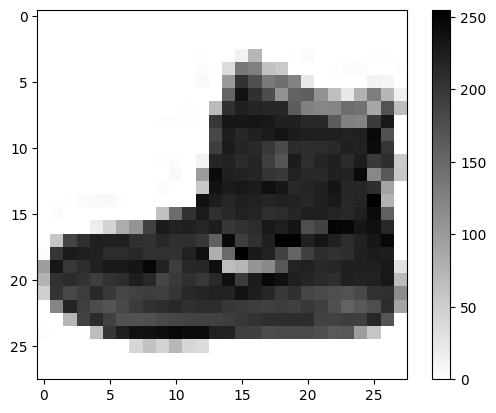

In [78]:
#这个代码必须是注释了上面的 transforms.ToTensor()才能够运行的
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")  # 显示图片
    plt.colorbar()  # 显示颜色条
    plt.show()


show_single_image(img)